### Clustering

In [1]:
# Bu ödevde San Francisco Airport datasını inceleyip Clustering kullanarak yolcu hareketlerine göre benzer özellik taşıyan kümeleri bulacağız.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [5]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [8]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804
18884,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243


In [9]:
df['Operating Airline'].value_counts() 

Operating Airline
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 89, dtype: int64

In [10]:
df['Published Airline'].value_counts()

Published Airline
United Airlines - Pre 07/01/2013    2645
United Airlines                     2004
Alaska Airlines                     1203
Delta Air Lines                      975
American Airlines                    588
                                    ... 
Trego Dugan Aviation                   2
Evergreen International Airlines       2
Atlas Air, Inc                         2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 79, dtype: int64

In [11]:
df['GEO Region'].value_counts()

GEO Region
US                     6981
Asia                   4073
Europe                 2803
Canada                 1794
Mexico                 1455
Australia / Oceania     951
Central America         383
Middle East             354
South America            91
Name: count, dtype: int64

In [12]:
pd.set_option('display.max_columns',100)  # 100 tane stün gösterir
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [15]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

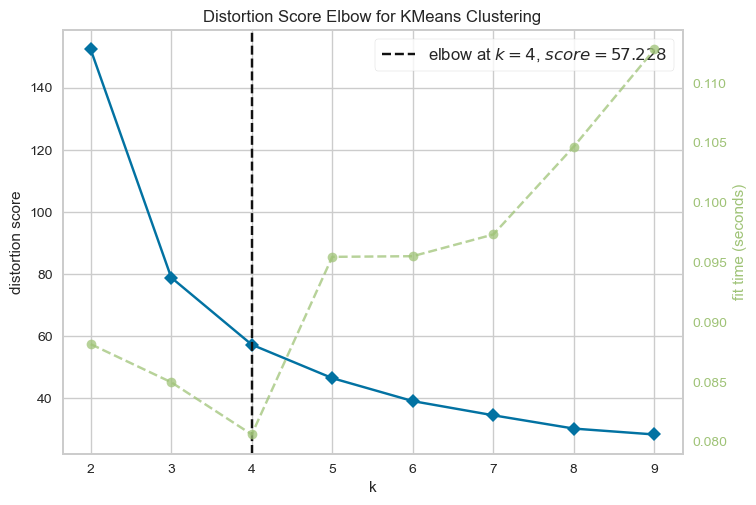

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
data  = linkage(X , method = 'ward' , metric = 'euclidean')

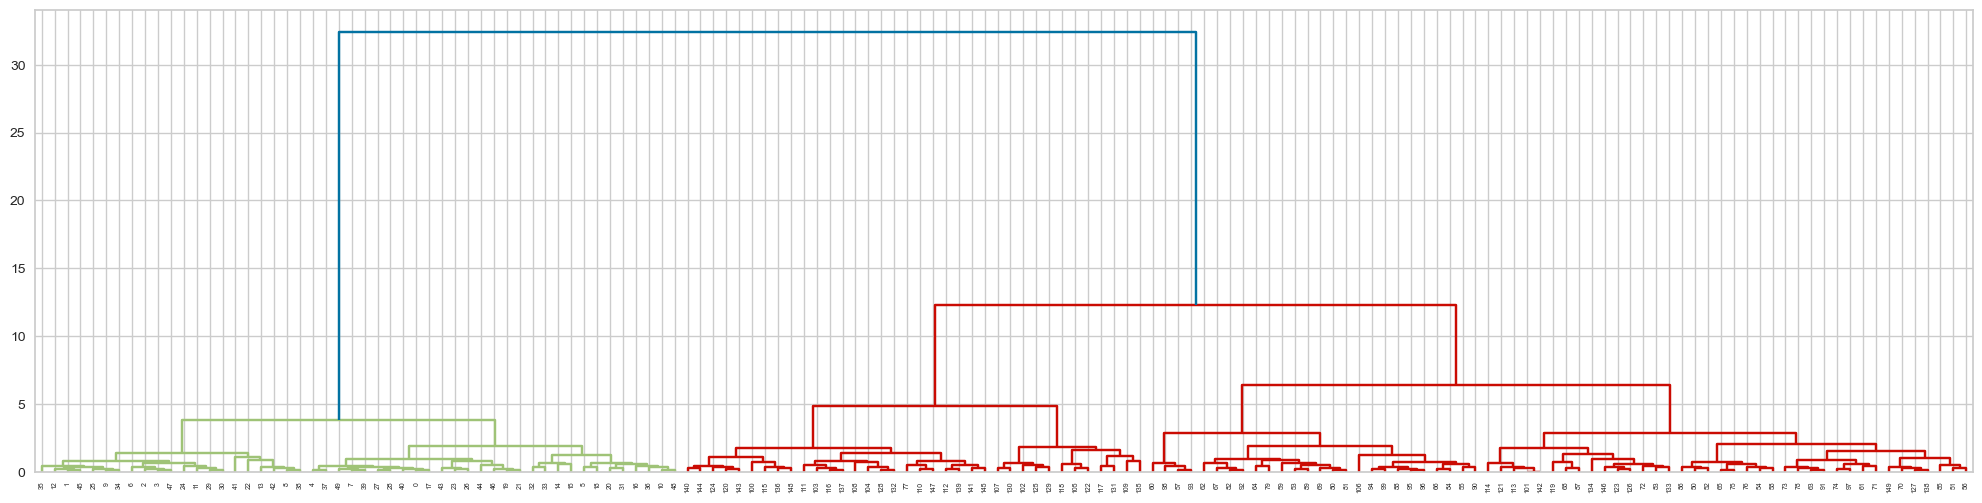

In [20]:
plt.figure(figsize= (25,6))
dendrogram(data);

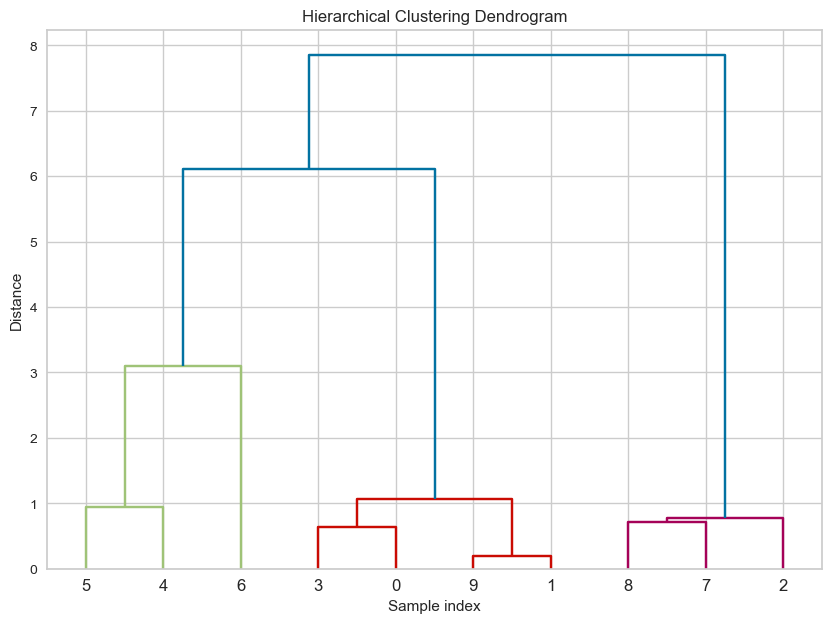

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, _ = make_blobs(n_samples=10, centers=3, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score